# Wind Power Forecasting


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv1D, MaxPooling1D
from tensorflow.keras.layers import Dense, LSTM, RepeatVector, TimeDistributed, Flatten, Dropout, Bidirectional
import math
from sklearn.metrics import mean_squared_error, mean_absolute_error
import seaborn as sns
from matplotlib import pyplot

%matplotlib inline
sns.set(rc = {"figure.figsize" : (8, 6)})

Init Plugin
Init Graph Optimizer
Init Kernel


In [2]:
!ls /datasets/windpowerds

ls: /datasets/windpowerds: No such file or directory


In [3]:
df = pd.read_csv('T1.csv')

In [4]:
df.head()

,Date/Time,LV ActivePower (kW),Wind Speed (m/s),Theoretical_Power_Curve (KWh),Wind Direction (°)
0,01 01 2018 00:00,380.047791,5.311336,416.328908,259.994904
1,01 01 2018 00:10,453.769196,5.672167,519.917511,268.641113
2,01 01 2018 00:20,306.376587,5.216037,390.900016,272.564789
3,01 01 2018 00:30,419.645905,5.659674,516.127569,271.258087
4,01 01 2018 00:40,380.650696,5.577941,491.702972,265.674286


In [5]:
df.describe()

,LV ActivePower (kW),Wind Speed (m/s),Theoretical_Power_Curve (KWh),Wind Direction (°)
count,50530.000000,50530.000000,50530.000000,50530.000000
mean,1307.684332,7.557952,1492.175463,123.687559
std,1312.459242,4.227166,1368.018238,93.443736
min,-2.471405,0.000000,0.000000,0.000000
25%,50.677890,4.201395,161.328167,49.315437
50%,825.838074,7.104594,1063.776283,73.712978
75%,2482.507568,10.300020,2964.972462,201.696720
max,3618.732910,25.206011,3600.000000,359.997589


In [6]:
df.isnull().sum()

Date/Time                        0
LV ActivePower (kW)              0
Wind Speed (m/s)                 0
Theoretical_Power_Curve (KWh)    0
Wind Direction (°)               0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50530 entries, 0 to 50529
Data columns (total 5 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Date/Time                      50530 non-null  object 
 1   LV ActivePower (kW)            50530 non-null  float64
 2   Wind Speed (m/s)               50530 non-null  float64
 3   Theoretical_Power_Curve (KWh)  50530 non-null  float64
 4   Wind Direction (°)             50530 non-null  float64
dtypes: float64(4), object(1)
memory usage: 1.9+ MB


In [8]:
df.head()

,Date/Time,LV ActivePower (kW),Wind Speed (m/s),Theoretical_Power_Curve (KWh),Wind Direction (°)
0,01 01 2018 00:00,380.047791,5.311336,416.328908,259.994904
1,01 01 2018 00:10,453.769196,5.672167,519.917511,268.641113
2,01 01 2018 00:20,306.376587,5.216037,390.900016,272.564789
3,01 01 2018 00:30,419.645905,5.659674,516.127569,271.258087
4,01 01 2018 00:40,380.650696,5.577941,491.702972,265.674286


In [9]:
columns = ['Date', 'Active_Power', 'Windspeed', 'Theoretical_Power', 'Wind_direction']

In [10]:
df.columns = columns

In [11]:
df.head()

,Date,Active_Power,Windspeed,Theoretical_Power,Wind_direction
0,01 01 2018 00:00,380.047791,5.311336,416.328908,259.994904
1,01 01 2018 00:10,453.769196,5.672167,519.917511,268.641113
2,01 01 2018 00:20,306.376587,5.216037,390.900016,272.564789
3,01 01 2018 00:30,419.645905,5.659674,516.127569,271.258087
4,01 01 2018 00:40,380.650696,5.577941,491.702972,265.674286


/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


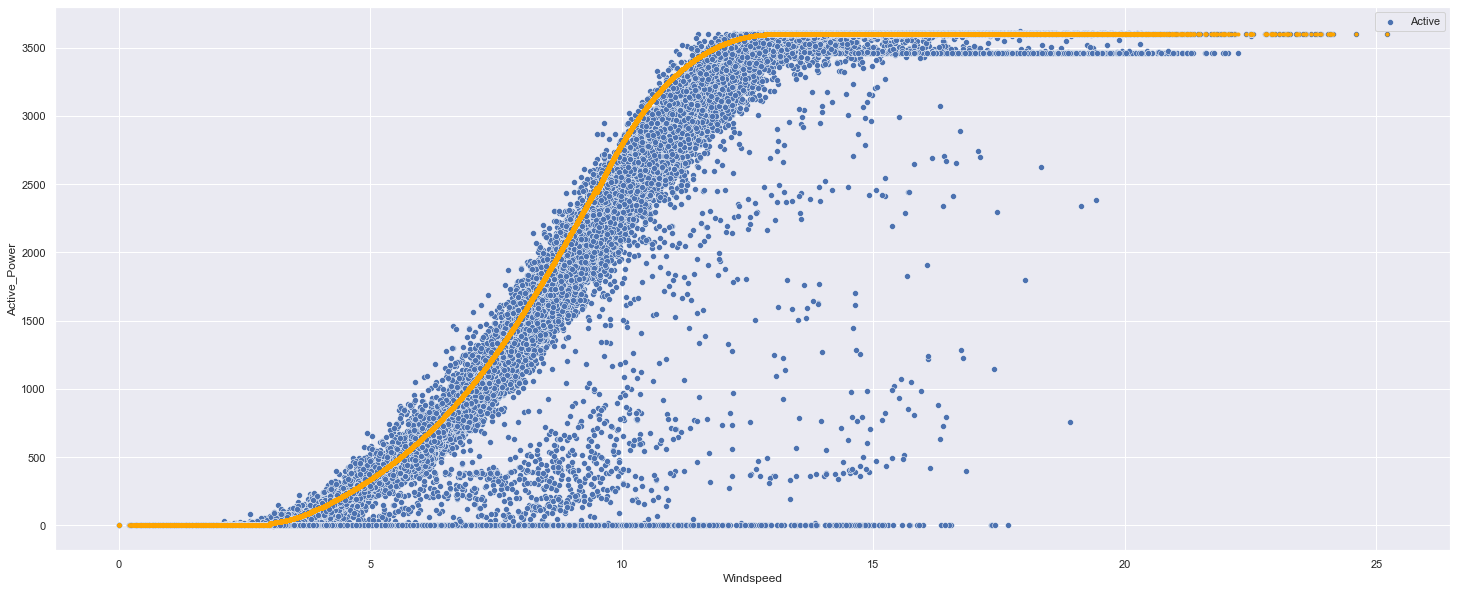

In [12]:
plt.figure(figsize=(25,10))
sns.scatterplot(df['Windspeed'], df['Active_Power'], label = 'Active')
plt.plot(df['Windspeed'], df['Theoretical_Power'], '.', color ='orange', label = 'Theoretical')

In [13]:
df['Loss'] = df['Theoretical_Power'] - df['Active_Power']

In [14]:
df['Date'] = pd.to_datetime(df['Date'])

In [15]:
df.head()

,Date,Active_Power,Windspeed,Theoretical_Power,Wind_direction,Loss
0,2018-01-01 00:00:00,380.047791,5.311336,416.328908,259.994904,36.281117
1,2018-01-01 00:10:00,453.769196,5.672167,519.917511,268.641113,66.148316
2,2018-01-01 00:20:00,306.376587,5.216037,390.900016,272.564789,84.523429
3,2018-01-01 00:30:00,419.645905,5.659674,516.127569,271.258087,96.481664
4,2018-01-01 00:40:00,380.650696,5.577941,491.702972,265.674286,111.052276


In [16]:
df1 = df[~((df['Active_Power']<=0) & (df['Windspeed'] > 3.3))]

In [17]:
df.set_index('Date', inplace=True)
df1.set_index('Date', inplace = True)

<AxesSubplot:xlabel='Date'>

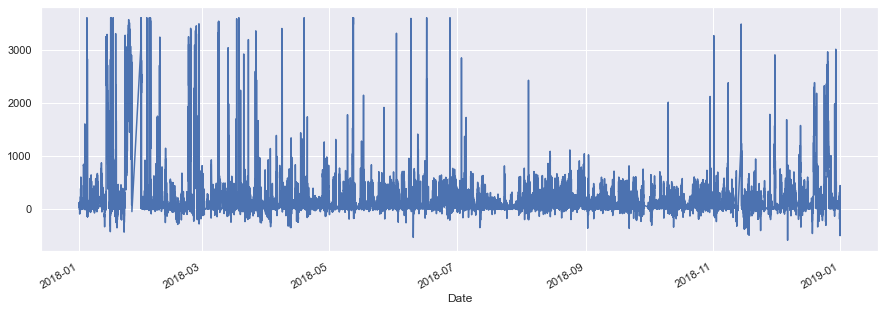

In [18]:
plt.figure(figsize=(15,5))
df['Loss'].plot()

<AxesSubplot:xlabel='Date'>

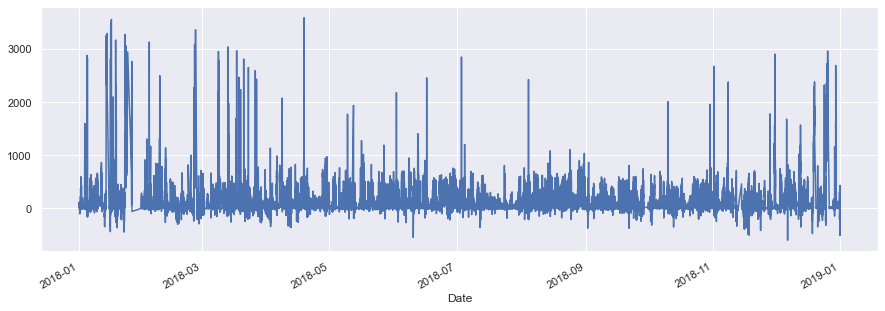

In [19]:
plt.figure(figsize=(15,5))
df1['Loss'].plot()

/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


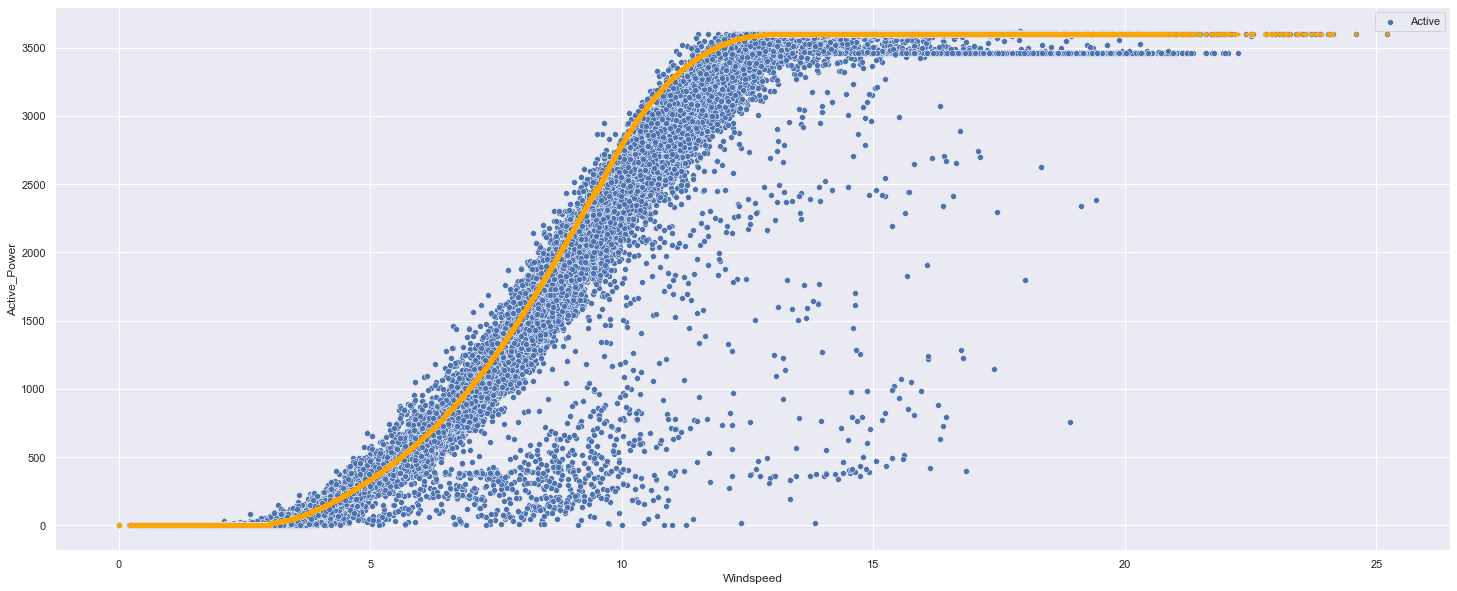

In [20]:
plt.figure(figsize=(25,10))
sns.scatterplot(df1['Windspeed'], df1['Active_Power'], label = 'Active')
plt.plot(df1['Windspeed'], df1['Theoretical_Power'], '.', color ='orange', label = 'Theoretical')

In [21]:
df1=df1[((df1["Active_Power"]!=0)&(df1["Windspeed"]>3.5)) | (df1["Windspeed"]<=3.5)]

In [22]:
df1 = (df1[ (df1['Windspeed'] < 9.5)  | (df1['Active_Power'] >= 1500) ])

In [23]:
df1 = (df1[ (df1['Windspeed'] < 6.5)  | (df1['Active_Power'] >= 500) ])

/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


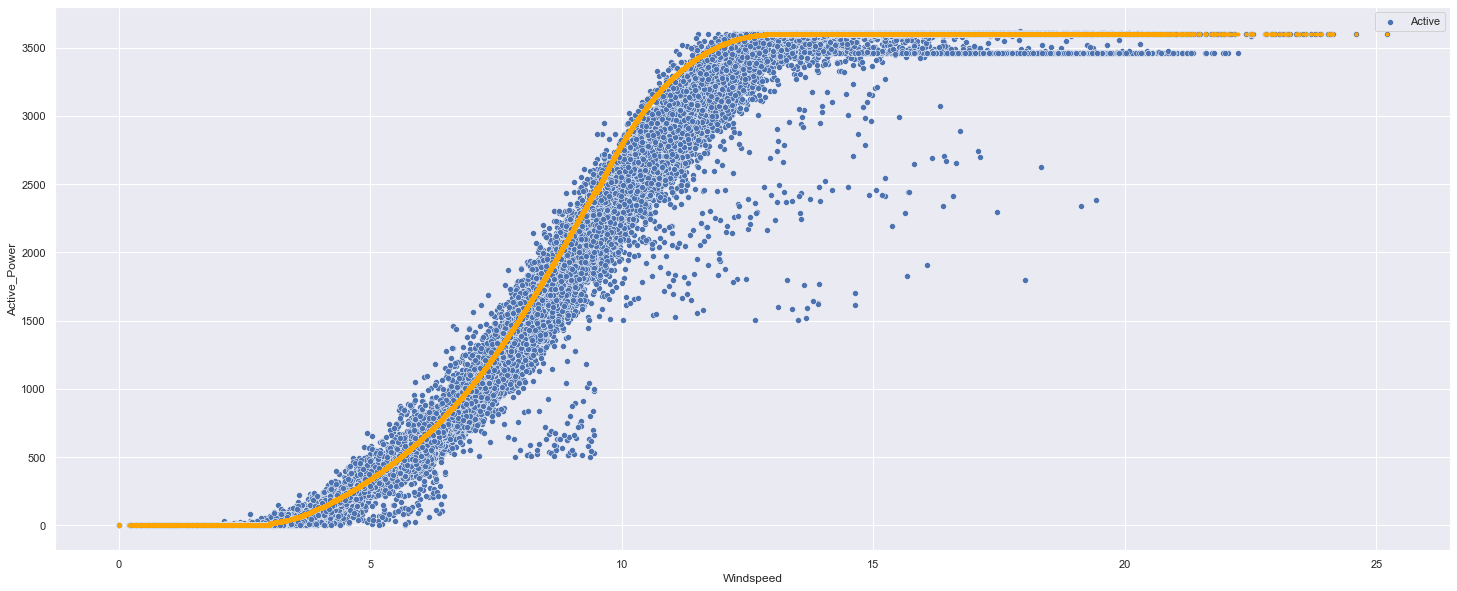

In [24]:
plt.figure(figsize=(25,10))
sns.scatterplot(df1['Windspeed'], df1['Active_Power'], label = 'Active')
plt.plot(df1['Windspeed'], df1['Theoretical_Power'], '.', color ='orange', label = 'Theoretical')

In [25]:
def direction(x):
    if x > 348.75 or x<11.25: return 'N'
    if x < 33.75: return 'NNE'
    if x < 56.25: return 'NE'
    if x < 78.75: return 'ENE'
    if x < 101.25: return 'E'
    if x < 123.75: return 'ESE'
    if x < 146.25: return 'SE'
    if x < 168.75: return 'SSE'
    if x < 191.25: return 'S'
    if x < 213.75: return 'SSW'
    if x < 236.25: return 'SW'
    if x < 258.75: return 'WSW'
    if x < 281.25: return 'W'
    if x < 303.75: return 'WNW'
    if x < 326.25: return 'NW'
    else: return 'NNW'

In [26]:
df1['Direction'] = df1['Wind_direction'].apply(direction)


In [27]:
df1.head()

,Active_Power,Windspeed,Theoretical_Power,Wind_direction,Loss,Direction
Date,,,,,,
2018-01-01 00:00:00,380.047791,5.311336,416.328908,259.994904,36.281117,W
2018-01-01 00:10:00,453.769196,5.672167,519.917511,268.641113,66.148316,W
2018-01-01 00:20:00,306.376587,5.216037,390.900016,272.564789,84.523429,W
2018-01-01 00:30:00,419.645905,5.659674,516.127569,271.258087,96.481664,W
2018-01-01 00:40:00,380.650696,5.577941,491.702972,265.674286,111.052276,W


/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Direction', ylabel='count'>

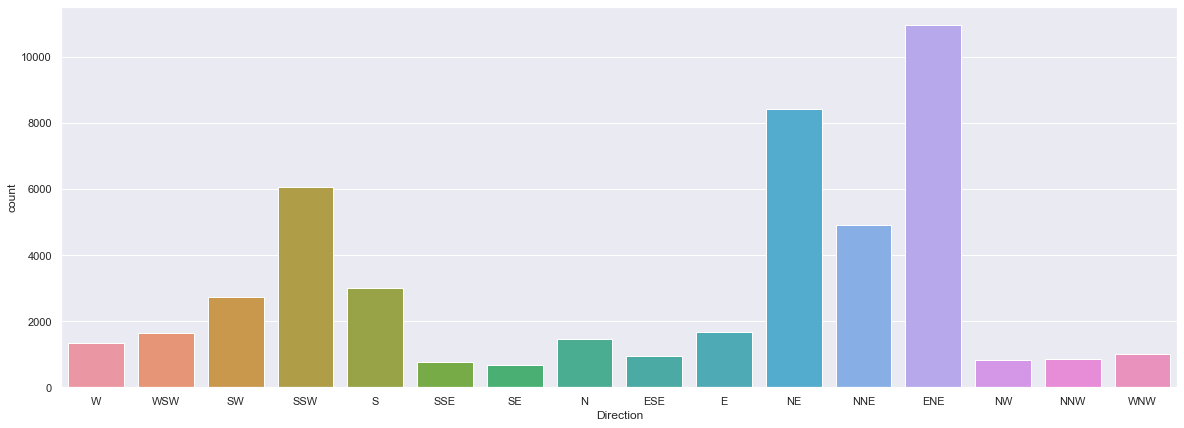

In [28]:
plt.figure(figsize=(20,7))
sns.countplot(df1['Direction'])

/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Direction', ylabel='Active_Power'>

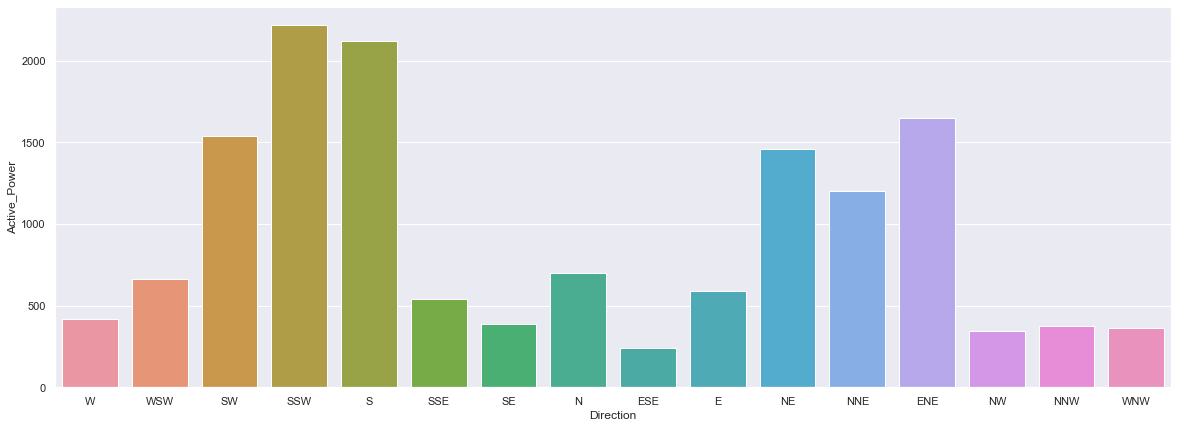

In [29]:
plt.figure(figsize=(20,7))
sns.barplot(df1['Direction'], df1['Active_Power'], ci=None)

/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Direction', ylabel='Windspeed'>

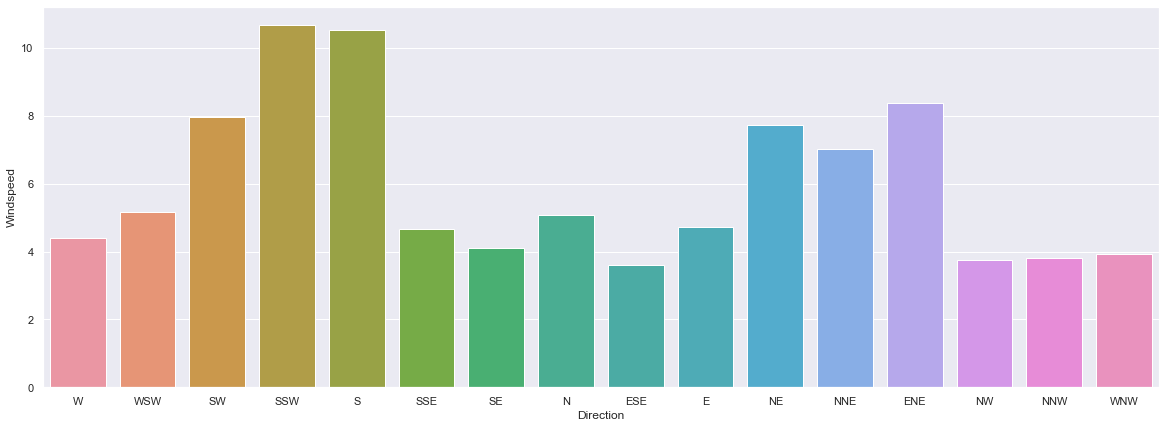

In [30]:
plt.figure(figsize=(20,7))
sns.barplot('Direction', 'Windspeed', data=df1, ci=None)

/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Direction', ylabel='Loss'>

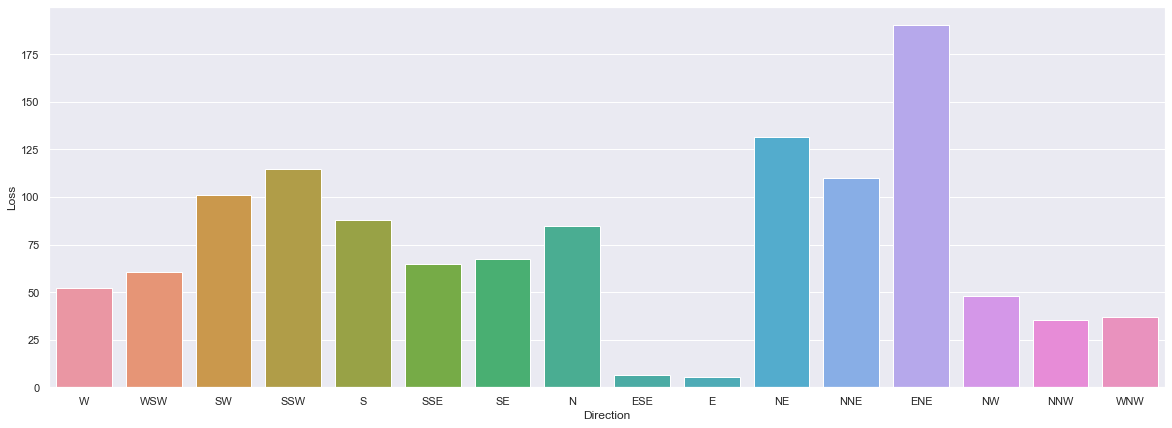

In [31]:
plt.figure(figsize=(20,7))
sns.barplot('Direction', 'Loss', data=df1, ci=None)

In [32]:
df2 = df1.reset_index()['Active_Power']
df3 = df1

In [33]:
print(df3.shape)

(47303, 6)


In [34]:
sc = MinMaxScaler(feature_range = (0, 1))
X = sc.fit_transform(np.array(df2).reshape(-1,1))

In [35]:
X_samples = list()
y_samples = list()
 
NumerOfRows = len(X)
TimeSteps=144

for i in range(TimeSteps , NumerOfRows , 1):
    x_sample = X[i-TimeSteps:i]
    y_sample = X[i]
    X_samples.append(x_sample)
    y_samples.append(y_sample)

X_data=np.array(X_samples)
X_data=X_data.reshape(X_data.shape[0],X_data.shape[1], 1)
print('\n#### Input Data shape ####')
print(X_data.shape)

# We do not reshape y as a 3D data  as it is supposed to be a single column only
y_data=np.array(y_samples)
y_data=y_data.reshape(y_data.shape[0], 1)
print('\n#### Output Data shape ####')
print(y_data.shape)


#### Input Data shape ####
(47159, 144, 1)

#### Output Data shape ####
(47159, 1)


In [36]:
TestingRecords= 14148
 
# Splitting the data into train and test
X_train=X_data[:-TestingRecords]
X_test=X_data[-TestingRecords:]
y_train=y_data[:-TestingRecords]
y_test=y_data[-TestingRecords:]

print('\n#### Training Data shape ####')
print(X_train.shape)
print(y_train.shape)
print('\n#### Testing Data shape ####')
print(X_test.shape)
print(y_test.shape)


#### Training Data shape ####
(33011, 144, 1)
(33011, 1)

#### Testing Data shape ####
(14148, 144, 1)
(14148, 1)


In [37]:
# Defining Input shapes for LSTM
TimeSteps=X_train.shape[1]
TotalFeatures=X_train.shape[2]
print("Number of TimeSteps:", TimeSteps)
print("Number of Features:", TotalFeatures)

Number of TimeSteps: 144
Number of Features: 1


# Vanilla LSTM

In [38]:
def vanillaLstm():
    model = Sequential()
    model.add(LSTM(units = 144))
    model.add(Dropout(0.2))
    model.add(Dense(units = 1))
    model.compile(optimizer = 'adam', loss = 'mean_squared_error')

    model.fit(X_train, y_train, epochs = 10, batch_size = 64)
    return model

# Stacked LSTM

In [39]:
def stackedLSTM():
    model = Sequential()
    
    model.add(LSTM(units = 50, return_sequences = True, input_shape = (144, 1)))
    model.add(Dropout(0.2))
    model.add(LSTM(units = 50))
    model.add(Dropout(0.2))
    model.add(Dense(units = 1))

    model.compile(optimizer = 'adam', loss = 'mean_squared_error')

    model.fit(X_data, y_data, epochs = 1, batch_size = 64)
    return model

# Bidirectional LSTM

In [40]:
def biLstm():    
    model = Sequential()

    model.add(Bidirectional(LSTM(units = 50)))
    model.add(Dropout(0.2))
    model.add(Dense(units = 1))
    model.compile(optimizer = 'adam', loss = 'mean_squared_error')

    model.fit(X_train, y_train, validation_data = (X_test,y_test), epochs = 10, batch_size = 64)
    return model

# MLP

In [41]:
def mlp():
    model = Sequential()
    model.add(Dense(144, input_shape = (144,1)))
    model.add(Flatten())
    model.add(Dense(72))
    model.add(Dense(36))
    model.add(Dense(36))
    model.add(Dense(36))
    model.add(Dense(36))
    model.add(Dense(18))
    model.add(Dense(9))
    model.add(Dense(4))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')

    model.fit(X_train, y_train, epochs=10,callbacks=[early_stoppping,reduce_lr_on_plateau])
    return model

# CNN

In [42]:
def cnn():
    model = Sequential()
    model.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(144,1)))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Conv1D(filters=128, kernel_size=2, activation='relu'))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Flatten())
    model.add(Dense(512, activation='relu'))
    model.add(Dense(256, activation='relu'))
    model.add(Dense(144))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')
    model.summary()
    
    model.fit(X_train, y_train, epochs=10)
    return model

In [43]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

early_stoppping = EarlyStopping(monitor='loss',patience=10,restore_best_weights=True)
reduce_lr_on_plateau = ReduceLROnPlateau(monitor='loss',factor=0.1,patience=5)

# Predictions

In [44]:
def predict(model):
    train_predict=model.predict(X_train)
    test_predict=model.predict(X_test)
    return train_predict, test_predict

In [45]:
class CurrentModelData:
  def __init__(self, model):
    self.model = model
    self.model.summary()
    self.train_predict, self.test_predict = predict(self.model)
    self.predicted_Power = sc.inverse_transform(self.test_predict)
    print(self.train_predict.shape,self.test_predict.shape)

In [46]:
mlpModelData = CurrentModelData(mlp())

Metal device set to: Apple M1

systemMemory: 8.00 GB
maxCacheSize: 2.67 GB



2021-11-11 22:24:52.035563: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2021-11-11 22:24:52.035698: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)
2021-11-11 22:24:52.277939: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)
2021-11-11 22:24:52.278151: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2021-11-11 22:24:52.430520: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Epoch 1/10
1032/1032 [==============================] - 14s 13ms/step - loss: 0.4886
Epoch 2/10
1032/1032 [==============================] - 14s 13ms/step - loss: 0.0057
Epoch 3/10
1032/1032 [==============================] - 14s 13ms/step - loss: 0.0052
Epoch 4/10
1032/1032 [==============================] - 14s 13ms/step - loss: 0.0053
Epoch 5/10
1032/1032 [==============================] - 14s 14ms/step - loss: 0.0050
Epoch 6/10
1032/1032 [==============================] - 14s 14ms/step - loss: 0.0050
Epoch 7/10
1032/1032 [==============================] - 15s 15ms/step - loss: 0.0051
Epoch 8/10
1032/1032 [==============================] - 15s 15ms/step - loss: 0.0050
Epoch 9/10
1032/1032 [==============================] - 15s 15ms/step - loss: 0.0052
Epoch 10/10
1032/1032 [==============================] - 15s 15ms/step - loss: 0.0048
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param # 

2021-11-11 22:27:16.089263: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


(14148, 1) (33011, 1)


In [47]:
cnnModelData = CurrentModelData(cnn())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 143, 64)           192       
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 71, 64)            0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 70, 128)           16512     
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 35, 128)           0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 4480)              0         
_________________________________________________________________
dense_10 (Dense)             (None, 512)               2294272   
_________________________________________________________________
dense_11 (Dense)             (None, 256)              

2021-11-11 22:27:30.356015: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


1032/1032 [==============================] - 10s 9ms/step - loss: 0.0142
Epoch 2/10
1032/1032 [==============================] - 9s 8ms/step - loss: 0.0097
Epoch 3/10
1032/1032 [==============================] - 8s 8ms/step - loss: 0.0091
Epoch 4/10
1032/1032 [==============================] - 8s 8ms/step - loss: 0.0087
Epoch 5/10
1032/1032 [==============================] - 9s 8ms/step - loss: 0.0085
Epoch 6/10
1032/1032 [==============================] - 9s 8ms/step - loss: 0.0083
Epoch 7/10
1032/1032 [==============================] - 9s 8ms/step - loss: 0.0079
Epoch 8/10
1032/1032 [==============================] - 9s 8ms/step - loss: 0.0078
Epoch 9/10
1032/1032 [==============================] - 9s 8ms/step - loss: 0.0074
Epoch 10/10
1032/1032 [==============================] - 9s 8ms/step - loss: 0.0072
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)          

2021-11-11 22:28:56.926135: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


(14148, 1) (33011, 1)


In [48]:
biModelData = CurrentModelData(biLstm())

Epoch 1/10


2021-11-11 22:29:00.481110: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-11 22:29:00.581886: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-11 22:29:00.591718: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-11 22:29:01.136423: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-11 22:29:01.150119: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


516/516 [==============================] - ETA: 0s - loss: 0.0122

2021-11-11 22:29:48.076877: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-11 22:29:48.114815: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-11 22:29:48.122023: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


516/516 [==============================] - 58s 108ms/step - loss: 0.0122 - val_loss: 0.0068
Epoch 2/10
516/516 [==============================] - 51s 99ms/step - loss: 0.0068 - val_loss: 0.0059
Epoch 3/10
516/516 [==============================] - 51s 100ms/step - loss: 0.0059 - val_loss: 0.0049
Epoch 4/10
516/516 [==============================] - 52s 101ms/step - loss: 0.0054 - val_loss: 0.0047
Epoch 5/10
516/516 [==============================] - 52s 101ms/step - loss: 0.0052 - val_loss: 0.0046
Epoch 6/10
516/516 [==============================] - 52s 101ms/step - loss: 0.0051 - val_loss: 0.0046
Epoch 7/10
516/516 [==============================] - 52s 101ms/step - loss: 0.0050 - val_loss: 0.0046
Epoch 8/10
516/516 [==============================] - 52s 101ms/step - loss: 0.0050 - val_loss: 0.0046
Epoch 9/10
516/516 [==============================] - 52s 101ms/step - loss: 0.0049 - val_loss: 0.0046
Epoch 10/10
516/516 [==============================] - 52s 102ms/step - loss: 0.0049 

2021-11-11 22:37:44.883004: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-11 22:37:44.915041: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-11 22:37:44.921688: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


(14148, 1) (33011, 1)


In [49]:
stackedModelData = CurrentModelData(stackedLSTM())

2021-11-11 22:38:38.023495: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-11 22:38:38.120372: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-11 22:38:38.493487: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-11 22:38:38.874624: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-11 22:38:39.610920: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


737/737 [==============================] - 70s 91ms/step - loss: 0.0141
Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 144, 50)           10400     
_________________________________________________________________
dropout_1 (Dropout)          (None, 144, 50)           0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dropout_2 (Dropout)          (None, 50)                0         
_________________________________________________________________
dense_15 (Dense)             (None, 1)                 51        
Total params: 30,651
Trainable params: 30,651
Non-trainable params: 0
_________________________________________________________________


2021-11-11 22:39:47.171943: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-11 22:39:47.201297: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-11 22:39:47.564528: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


(14148, 1) (33011, 1)


In [50]:
vanillaModelData = CurrentModelData(vanillaLstm())

Epoch 1/10


2021-11-11 22:40:40.390143: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-11 22:40:40.450435: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-11 22:40:40.838898: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


516/516 [==============================] - 33s 62ms/step - loss: 0.0103
Epoch 2/10
516/516 [==============================] - 31s 59ms/step - loss: 0.0056
Epoch 3/10
516/516 [==============================] - 31s 60ms/step - loss: 0.0049
Epoch 4/10
516/516 [==============================] - 31s 60ms/step - loss: 0.0047
Epoch 5/10
516/516 [==============================] - 31s 60ms/step - loss: 0.0046
Epoch 6/10
516/516 [==============================] - 31s 61ms/step - loss: 0.0046
Epoch 7/10
516/516 [==============================] - 31s 61ms/step - loss: 0.0046
Epoch 8/10
516/516 [==============================] - 31s 61ms/step - loss: 0.0045
Epoch 9/10
516/516 [==============================] - 32s 61ms/step - loss: 0.0045
Epoch 10/10
516/516 [==============================] - 32s 62ms/step - loss: 0.0045
Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)             

2021-11-11 22:45:54.918277: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-11 22:45:54.940915: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


(14148, 1) (33011, 1)


In [51]:
y_train.shape,y_test.shape

((33011, 1), (14148, 1))

# Performance Analysis

In [52]:
def checkPerformance(true,predicted):
    mean_abs = mean_absolute_error(true,predicted)
    mean_squared = mean_squared_error(true,predicted)
    root_mean_squared = math.sqrt(mean_squared)
    print('Mean Absolute Error:',mean_abs)
    print('Mean Squared Error:',mean_squared)
    print('Root Mean Squared Error:',root_mean_squared)

In [ ]:
checkPerformance(y_test, mlpModelData.test_predict)

In [54]:
orig=sc.inverse_transform(y_test)

# Final Prediction Plot

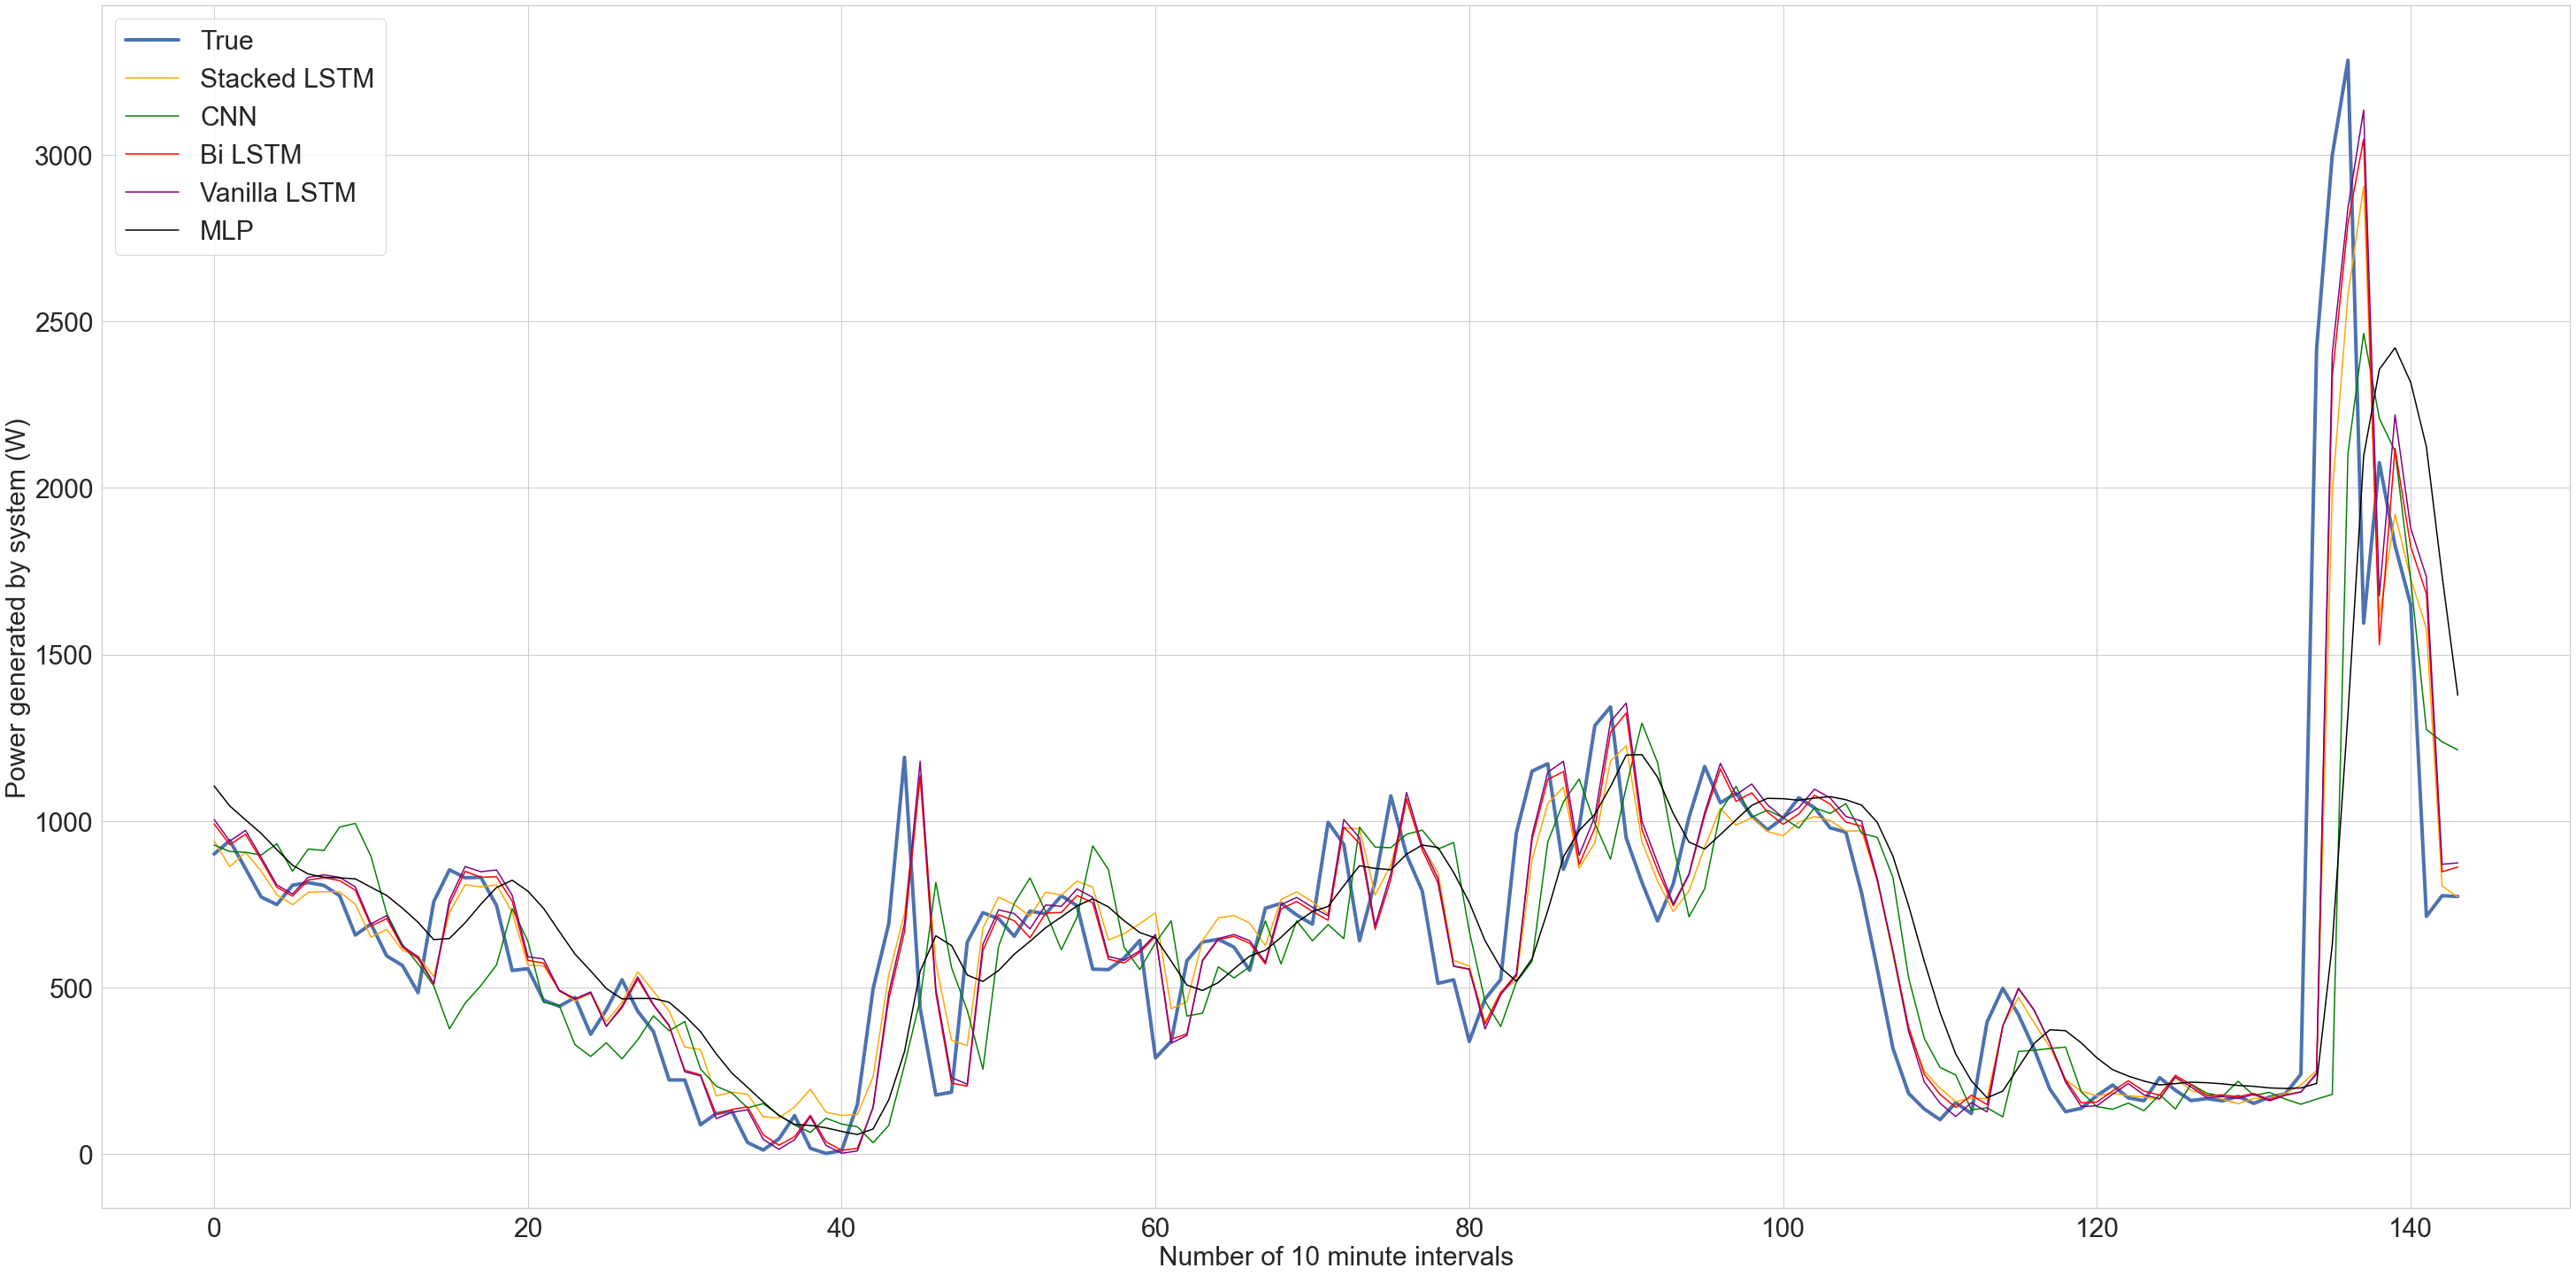

In [77]:
sns.set_style("whitegrid")
pyplot.figure(figsize=(50,25))
pyplot.plot(orig[0:144], label="True",linewidth = '4')
pyplot.plot(mlpModelData.test_predict[0:144], label="Stacked LSTM", color = 'orange')
pyplot.plot(cnnModelData.test_predict[0:144], label="CNN", color = 'green')
pyplot.plot(biModelData.test_predict[0:144], label="Bi LSTM", color = 'red')
pyplot.plot(vanillaModelData.test_predict[0:144], label="Vanilla LSTM", color = 'purple')
pyplot.plot(stackedModelData.test_predict[0:144], label="MLP", color = 'black')

pyplot.legend(loc='upper left', fontsize=30)
pyplot.xlabel("Number of 10 minute intervals", fontsize=30)
pyplot.ylabel("Power generated by system (W)", fontsize=30)
pyplot.xticks(fontsize=30)
pyplot.yticks(fontsize=30)
pyplot.show()